In [19]:
## Load needed packages for this notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy.special
import imageio

def truelloydfringe(h,y,lambda0,D):
    return np.sin(np.pi*h*y/lambda0/np.sqrt(y**2+D**2))**2

def lloydfringe(h,y,lambda0,D):
    return np.sin(np.pi*h*y/lambda0/D)**2

def edge_diffraction(lambda0,D,y):
    v = y * np.sqrt(2/lambda0/D)
    ss, cc = scipy.special.fresnel(v)
    up = (cc + ss*1j + 0.5 + 0.5j)/(1+1j)
    return abs(up)**2

# Lloyd's Interference Fringes

One of the simplest ways to demonstrate constructive and destructive interference of light is to use a single source and a mirror. (First described by Humphrey Lloyd in &ldquo;On a new case of interference of the rays of light,&rdquo; *Transactions of the Royal Irish Academy*, **17**, 171--177, 1837.)

<img src="https://omlc.org/~prahl/host/450/week4/lloyd-two-sources.png" width="50%">

Here, a small source $S_1$ emits light.  Some light goes directly to the screen and some reflects off the surface and then hits the screen.  The reflected light appears to arise from the location $S_1'$.  

Only two rays will reach any particular location $y$ on the screen (Why?).  These waves travel two different distances and therefore may constructively and destructively interfere depending distances traveled.  

You probably have forgotten, but when an electric field is reflected off a mirror it must change its phase by 180°.  Since the mirror is metallic and conducting, the incident electric field on the (grounded) conductive surface will be zero. *The way to achieve this is for the reflected field to be exactly out of phase with the incident field.*

Constructive interference will occur when the direct and bounced rays are half a wavelength out of phase (because of the 180° phase shift above
$$
(m+1/2)\lambda = L_\mathrm{bounce} - L_\mathrm{direct} = \sqrt{(y+h/2)^2+D^2}- \sqrt{(y-h/2)^2+D^2}
$$
Another way to look at the problem is that $S_1$ and $S_1'$ are two slits with the minima and maxima swapped.  In that case then we would have Young's equation
where $h$ is the separation between the two sources and $D$ is the distance to the screen.  

Since $\theta=\tan^{-1}(y/D)$
$$
I(y)/I_0 = \sin^2\left( \pi{h \over \lambda }\sin( \tan^{-1}(y/D)) \right) = \sin^2\left( \pi{h y\over \lambda \sqrt{D^2+y^2} } \right)
$$
which for $D\gg y$ is
$$
I(y)/I_0 = \sin^2\left( \pi{h y\over D\lambda } \right)
$$

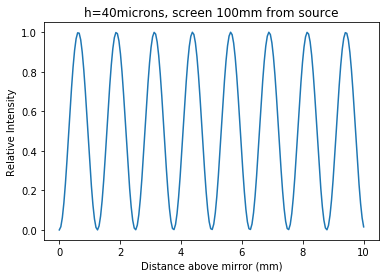

In [2]:
h = 0.04e-3
Lambda = 500e-9
D = 100e-3

y = np.linspace(0,10,200)
I = truelloydfringe(h,y*1e-3,Lambda,D)

plt.plot(y,I)
plt.xlabel("Distance above mirror (mm)")
plt.ylabel("Relative Intensity")
plt.title("h=40microns, screen 100mm from source")
plt.show()

## Measuring the separation between the real and virtual images

One thing that you'll need to know is the separation $h$ between the real and virtual sources.  The distance is really small, so it will be hopeless to measure with a ruler.  

Surprisingly, use a lens to magnify the separation.  This is an imaging configuration, so it is important to sharply focus both $S_1$ and $S_1'$

<img src="http://omlc.org/~prahl/host/450/week4/lloyd-lens.png" width="50%">

Now use the fact that the distances $s$ and $s'$ can give you the necessary magnification $M$ to determine $h$
$$
h = {h'\over M} = h' {s\over s'}
$$

## Diffraction from a sharp edge

One thing you need to watch for in the is experiment is when the source is below the mirror.  

<img src="http://www.celtrio.com/support/documentation/coverazone/2.0.1/images/diffraction.png" >

In this case there are not two sources, but just one.  The diffraction pattern on a screen created by an edge is distinctive

<img src="http://omlc.org/~prahl/host/450/week4/edge.jpg" width="30%">

Of course this pattern can be calculated (using Fresnel integrals).  The screen pattern only depends on the position of the source and the wavelength.  **This is not what you want.**

The way that D is determined experimentally for the straightedge is that
$$
{1\over D} = {1\over z} + {1\over z}
$$
where $z$ is the distance from the point source to the straightedge and $z'$ is the distance from the straightedge to the screen (camera).

## Importing and analyzing an image in Jupyter

This is pretty easy for common image formats

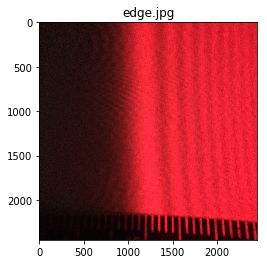

In [3]:
image = imageio.imread("http://omlc.org/~prahl/host/450/week4/edge.jpg")

plt.imshow(image)
plt.title("edge.jpg")
plt.show()

The image format is a three dimensional array.  Three separate two by two arrays that represent red, green, and blue. 

In [4]:
print("shape: ", image.shape)

shape:  (2448, 2448, 3)


Obviously, we will need to get to a simple 2x2 array (monochrome image).  This is readily done

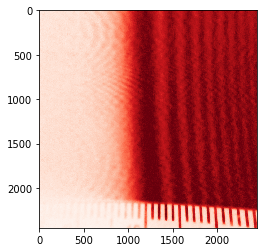

shape:  (2448, 2448)


In [5]:
imageB = image[:,:,2]
imageG = image[:,:,1]
imageR = image[:,:,0]
plt.imshow(imageR,cmap='Reds')
#plt.imshow(imageG,cmap='Greens')
#plt.imshow(imageB,cmap='Blues')

plt.show()

print("shape: ", imageR.shape)

To get a subset of this image is easy too.  Lets get a horizontal slice 200 pixels high around row 1500.

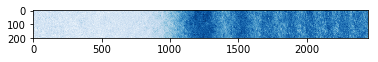

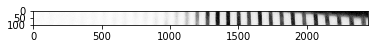

rows in image  200


In [6]:
imageRBand = imageR[1400:1600,:]
imageGBand = imageG[1400:1600,:]
imageBBand = imageB[1400:1600,:]

imageRuler = imageR[2200:2300,:]

plt.imshow(imageBBand, cmap="Blues")
plt.show()

plt.imshow(imageRuler, cmap="Greys")
plt.show()

rows, cols = imageBBand.shape
print("rows in image ", rows)

Now we want to average each column.  We see that the red data is saturated at 255 and is not so good.  The green channel is too noisy.  Therefore the blue channel is just right.

In [7]:
rows, cols = imageRBand.shape
sumsR=imageRBand.sum(axis=0)/rows
sumsG=imageGBand.sum(axis=0)/rows
sumsB=imageBBand.sum(axis=0)/rows

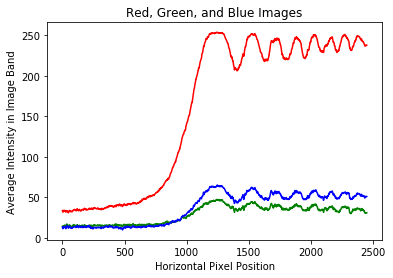

In [8]:
plt.plot(sumsR, color="red")
plt.plot(sumsG, color="green")
plt.plot(sumsB, color="blue")

plt.xlabel("Horizontal Pixel Position")
plt.ylabel("Average Intensity in Image Band")
plt.title("Red, Green, and Blue Images")
plt.show()

As well as the ruler

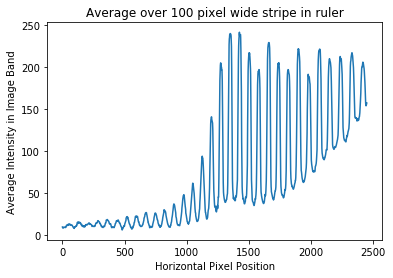

In [9]:
rows, cols = imageRuler.shape
rulersums =imageRuler.sum(axis=0)/rows

plt.plot(rulersums)
plt.xlabel("Horizontal Pixel Position")
plt.ylabel("Average Intensity in Image Band")
plt.title("Average over 100 pixel wide stripe in ruler")
plt.show()

Each peak represents the 1mm markings on the ruler.  If you count, there are 25 peaks between 510 and 2400.  Therefore an axis there are roughly 76 pixels per millimeter.  The total width of the image in millimeters is then known.  We now need to create an array that ranges from 0 to the total width with exactly the number of horizontal pixels in the image.  This is readily done with `np.linspace(0,width,pixels_across)`

## Diffraction from a Knife Edge (550 Students)

### Theory
Plane waves are incident from the left.  A razor or another object with a sharp edge blocks half the beam.

<img src="http://omlc.org/~prahl/host/450/week4/straightedge-straightdope.png" width="30%">

The normalized intensity $I(y)$ is given by
$$
I(y) = (1/2+ \cal{C}(v))^2 + (1/2 + \cal{S}(v))^2
$$
where $\cal{S}(v)$ and $\cal{C}(v)$ are Fresnel integrals and $v$ is
$$
v = \sqrt{
{2\over\lambda}
\left( 
{1\over r'}+{1\over s'}
\right)}\cdot \Delta y \cos\delta
$$

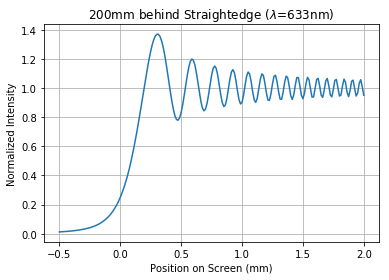

In [10]:
lambda0 = 632.8e-9
D = 200e-3

y = np.linspace(-0.5, 2.0, 201)
intensity = edge_diffraction(lambda0,D,y*1e-3)

plt.plot(y,intensity)
plt.grid(True)
plt.xlabel("Position on Screen (mm)")
plt.ylabel("Normalized Intensity")
plt.title("200mm behind Straightedge ($\lambda$=633nm)")
plt.show()

### Experimental Data

We want to examine the data from the image above quantitatively.  Start by rescaling to the correct size.

In [11]:
rows, cols = imageB.shape
pixels_per_mm = (2400-510)/25.0
image_width = cols/pixels_per_mm
y = np.linspace(0,image_width,cols)

The data needed to be normalized so that the intensity oscillates around 1 and remove background light that should be subtracted.

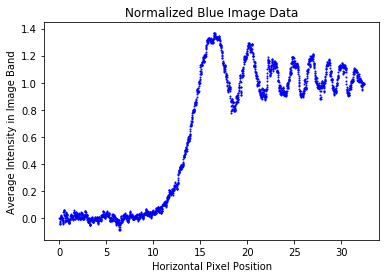

In [12]:
total=0
for i in range(0,500):
    total += sumsB[i]
background = total/500

norm = 38

plt.scatter(y,(sumsB-background)/norm, color="blue", s=1)
plt.xlabel("Horizontal Pixel Position")
plt.ylabel("Average Intensity in Image Band")
plt.title("Normalized Blue Image Data")
plt.show()


The last thing is to offset the numbers in the axis because zero is measured from the edge.  Twelve millimeters moved the theoretical curve to the right location.

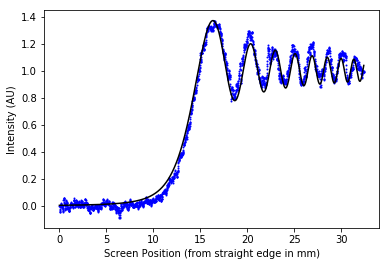

In [13]:
Lambda=632.8e-9
D = 40000e-3  #absurd value
offset_in_mm = 12.0

intensity = edge_diffraction(Lambda,D,(y-offset_in_mm)*1e-3)
normalized_data = (sumsB-background)/norm

plt.scatter(y,normalized_data,s=1,color='blue')
plt.plot(y,intensity,color='black')
plt.xlabel("Screen Position (from straight edge in mm)")
plt.ylabel("Intensity (AU)")
plt.show()

# Pre-lab Questions

### Problem 1
Graph the fringe pattern $I/I_0$ for $h$=0.1mm and $h$=1mm as a function of $y$.  Choose reasonable values for the other parameters.

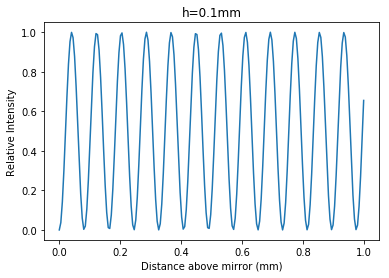

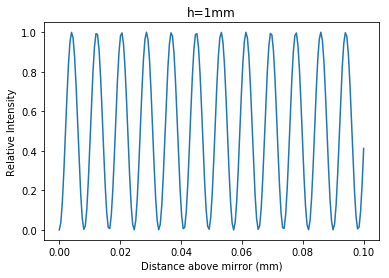

In [14]:
# YOUR CODE HERE
raise NotImplementedError()

### Problem 2

What is the separation between maxima?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 3
Why should the front edge of the mirror be close to the focused spot $S_1$?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 4
If you know the fringe spacing $\Delta y$, the source distance $h$, and $D$, what is the equation for the wavelength?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 5
What are the advantages and disadvantages of using black glass, a front surface mirror, or just a thick piece of glass as the reflecting surface in this experiment?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 6
Open <code>edge.jpg</code> in Jupyter.  Split the image into separate red, green and blue images (red, green, and blue).  Which image is most useful and why?

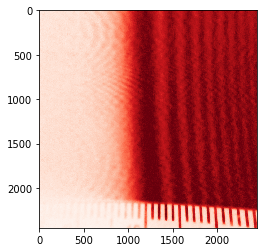

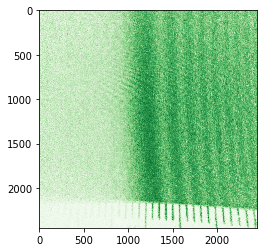

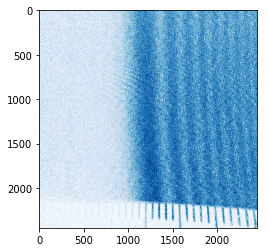

In [15]:
# YOUR CODE HERE
raise NotImplementedError()

### Problem 7
Determine the number of pixels needed for 10mm on the ruler and use this to determine the horizontal scale. 

In [16]:
# YOUR CODE HERE
raise NotImplementedError()
print('the scale is %.0f pixels/mm' % scale)

the scale is 79 pixels/mm


### Problem 8 
Select a horizontal rectangle the full width of the image that contains the central one-third of the image.  

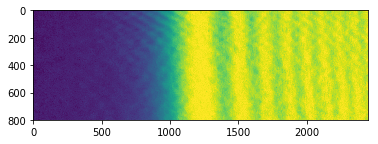

In [17]:
# YOUR CODE HERE
raise NotImplementedError()

### Problem 9 (550 Students)
Extract the fringe data and plot.  Do your own fit.

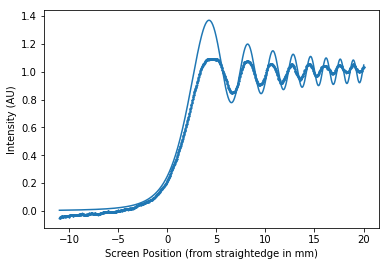

In [18]:
# YOUR CODE HERE
raise NotImplementedError()

## Experiment

Acquire a nice image of Lloyd's fringes and the interference fringes from a straightedge.

Align the HeNe through the spatial filter with 20X objective.  Since the mirror cannot be located at the pinhole (!?) you'll need to refocus the light to create your point source.

<img src="http://omlc.org/~prahl/host/450/week4/spatial.jpg" width="25%">

Use the first surface mirror mounted on the three axis stage.    

<img src="http://omlc.org/~prahl/host/450/week4/mirror.jpg" width="25%">

Place a CCD camera in the image plane (without lens).  Use a neutral density filter to attenuate the beam if necessary.

Carefully adjust the mirror so that its front edge is within a millimeter of the focused laser beam.  Set up a screen and look for interference fringes.  The interference pattern will only appear where the reflected light and the direct beam overlap.  

Do not be confuse straightedge fringes from those of Lloyd!

A good interference pattern will have 40--50 straight, non-saturated fringes.  Capture an image.  Note that the cameras have 1280$\times$960 square pixels and the corner-to-corner detector distance is 6.07mm.

<img src="http://omlc.org/~prahl/host/450/week4/lloyd-overlap.png" width="50%">

Measure the separation between the source $S_1$ and virtual source $S_1'$ using another positive lens.  Do this for a few different image configurations (values of $s$ and $s'$).

550 Students.  Capture some straightedge fringes.  Make sure you measure $z$ and $z'$ so that you can determine $D$.

## Analysis

Plot expected vs measured fringes for both the Lloyd and straightedge fringes.

To reduce noise, you'll probably want to collect a horizontal stripe of the interference pattern and average the values in each column (as shown above).

Comment on the parameters you needed to use to make the fit work with the actual values.

550 Students analyze your knife edge data.